# Libraries

In [1056]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor

import warnings

from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

# Veri Yükleme

In [1057]:
musteri_df = pd.read_csv('musteri_verisi_5000_utf8.csv')
satis_df = pd.read_csv('satis_verisi_5000.csv',index_col=0)

# İlk bakış

## Müsteri Verisi

In [1058]:
print(f'The Musteri dataset has {musteri_df.shape[0]} rows and {musteri_df.shape[1]} columns')

The Musteri dataset has 5000 rows and 6 columns


In [1059]:
musteri_df.head()

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,4353,Gülşahin,Kadın,57,Gaziantep,2726.010
1,8374,Yahşikan,Erkek,66,Gaziantep,4754.700
2,3902,Candeniz,Erkek,61,Konya,867.200
3,2080,Gözel,Erkek,64,Adana,2020.970
4,7901,Erdogan,Kadın,63,İstanbul,4334.160


In [1060]:
musteri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   musteri_id       5000 non-null   int64  
 1   isim             5000 non-null   object 
 2   cinsiyet         5000 non-null   object 
 3   yas              5000 non-null   int64  
 4   sehir            5000 non-null   object 
 5   harcama_miktari  5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [1061]:
musteri_df.describe().T

,count,mean,std,min,25%,50%,75%,max
musteri_id,5000.000,5478.339,2605.861,1001.000,3188.250,5441.500,7738.750,9999.000
yas,5000.000,43.704,15.083,18.000,31.000,44.000,57.000,69.000
harcama_miktari,5000.000,2554.959,1415.329,100.230,1313.148,2515.985,3793.523,4999.440


In [1062]:
musteri_df.describe(include = ['object']).T

,count,unique,top,freq
isim,5000,1459,Selvi,12
cinsiyet,5000,2,Erkek,2503
sehir,5000,8,Gaziantep,652


In [1063]:
musteri_df.nunique().sort_values(ascending=False)

musteri_id         5000
harcama_miktari    4968
isim               1459
yas                  52
sehir                 8
cinsiyet              2
dtype: int64

## Satis Verisi

In [1064]:
print(f'The Satıs dataset has {satis_df.shape[0]} rows and {satis_df.shape[1]} columns')

The Satıs dataset has 5000 rows and 8 columns


In [1065]:
satis_df.head(10)

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,2023-07-02,P032,Mouse,Elektronik,1207.3,13,15694.9,9225
1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955
2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367
3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869
4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724
5,2023-06-20,P037,Fırın,Ev Aletleri,266.4,10,2664.0,7948
6,2023-08-22,P082,Defter,Kırtasiye,1290.3,8,10322.4,4184
7,2024-05-11,P063,Klima,Elektronik,627.78,17,10672.26,1522
8,2024-07-26,P010,Çanta,Giyim,749.39,8,5995.12,5504
9,2023-03-15,P082,Defter,Kırtasiye,193.65,16,3098.4,1722


In [1066]:
satis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tarih         5000 non-null   object
 1   ürün_kodu     5000 non-null   object
 2   ürün_adi      5000 non-null   object
 3   kategori      5000 non-null   object
 4   fiyat         5000 non-null   object
 5   adet          5000 non-null   int64 
 6   toplam_satis  5000 non-null   object
 7   musteri_id    5000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 351.6+ KB


In [1067]:
satis_df['tarih'] = pd.to_datetime(satis_df['tarih'])

In [1068]:
print(f"Fiyat verisi unuqie değer sayısı: {satis_df['fiyat'].nunique()}.")
print(f"Fiyat verisi unuqie değer sayısı: {satis_df['toplam_satis'].nunique()}.")

Fiyat verisi unuqie değer sayısı: 4907.
Fiyat verisi unuqie değer sayısı: 4987.


In [1069]:
satis_df['toplam_satis'] = pd.to_numeric(satis_df['toplam_satis'], errors='coerce')
satis_df['fiyat'] = pd.to_numeric(satis_df['fiyat'], errors='coerce')

In [1070]:
print(f"Fiyat verisi unuqie değer sayısı: {satis_df['fiyat'].nunique()}.")
print(f"Fiyat verisi unuqie değer sayısı: {satis_df['toplam_satis'].nunique()}.")

Fiyat verisi unuqie değer sayısı: 4866.
Fiyat verisi unuqie değer sayısı: 4983.


In [1071]:
satis_df.head(10)

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,2023-07-02,P032,Mouse,Elektronik,1207.300,13,15694.900,9225
1,2024-02-11,P011,Kalem,Kırtasiye,237.140,16,3794.240,3955
2,2023-03-06,P024,Bilgisayar,Elektronik,1024.290,9,9218.610,2367
3,2024-04-11,P063,Klima,Elektronik,1477.880,9,13300920000000000.000,2869
4,2024-01-08,P063,Klima,Elektronik,949.430,19,18039.170,9724
5,2023-06-20,P037,Fırın,Ev Aletleri,266.400,10,2664.000,7948
6,2023-08-22,P082,Defter,Kırtasiye,1290.300,8,10322.400,4184
7,2024-05-11,P063,Klima,Elektronik,627.780,17,10672.260,1522
8,2024-07-26,P010,Çanta,Giyim,749.390,8,5995.120,5504
9,2023-03-15,P082,Defter,Kırtasiye,193.650,16,3098.400,1722


In [1072]:
satis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tarih         5000 non-null   datetime64[ns]
 1   ürün_kodu     5000 non-null   object        
 2   ürün_adi      5000 non-null   object        
 3   kategori      5000 non-null   object        
 4   fiyat         4958 non-null   float64       
 5   adet          5000 non-null   int64         
 6   toplam_satis  4996 non-null   float64       
 7   musteri_id    5000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 351.6+ KB


In [1073]:
hatali_satirlar = satis_df[satis_df['toplam_satis'] != satis_df['fiyat'] * satis_df['adet']]

print("Eşit olmayan satırlar:")
print(len(hatali_satirlar))
print(hatali_satirlar[:10])

Eşit olmayan satırlar:
987
        tarih ürün_kodu    ürün_adi    kategori    fiyat  adet          toplam_satis  musteri_id
3  2024-04-11      P063       Klima  Elektronik 1477.880     9 13300920000000000.000        2869
12 2024-03-20      P024  Bilgisayar  Elektronik 1302.350     7              9116.450        2863
13 2023-09-01      P063       Klima  Elektronik  270.140    13              3511.820        6923
15 2024-06-08      P082      Defter   Kırtasiye 1221.370     6  7328219999999990.000        4666
23 2024-09-16      P032       Mouse  Elektronik  926.760     3              2780.280        4046
25 2023-12-25      P087    Kulaklık  Elektronik 1074.510     3              3223.530        2144
27 2024-03-31      P082      Defter   Kırtasiye  420.900     3 12626999999999900.000        7110
30 2023-05-20      P087    Kulaklık  Elektronik 1487.710    14             20827.940        5038
31 2023-11-08      P063       Klima  Elektronik 1142.150     3 34264500000000000.000        9142
33 

In [1074]:
satis_df['toplam_satis'] = satis_df['fiyat'] * satis_df['adet']

In [1075]:
satis_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyat,4958.000,746.935,428.604,13.530,372.950,742.480,1117.598,1499.930
adet,5000.000,10.072,5.461,1.000,5.000,10.000,15.000,19.000
toplam_satis,4958.000,7535.202,6394.172,22.280,2168.970,5753.575,11601.480,28440.150
musteri_id,5000.000,5462.697,2593.183,1004.000,3202.000,5404.000,7710.000,9998.000


In [1076]:
satis_df.describe(include = ['object']).T

,count,unique,top,freq
ürün_kodu,5000,10,P011,533
ürün_adi,5000,10,Kalem,533
kategori,5000,5,Elektronik,2440


In [1077]:
satis_df.nunique().sort_values(ascending=False)

toplam_satis    4947
fiyat           4866
musteri_id      3147
tarih            731
adet              19
ürün_kodu         10
ürün_adi          10
kategori           5
dtype: int64

# Eksik Değer Analizi

In [1078]:
def highlight_missing_values(df, threshold=30):
    missing_values = df.isna().sum()
    percent_missing = df.isnull().mean() * 100

    columns_above_threshold = []
    html_content = "<h3>Percentage of missing values in each column:</h3>"
    html_content += "<table><tr><th>Column</th><th>Missing Percentage</th></tr>"

    for col, percent in zip(missing_values.index, percent_missing):
        if percent > threshold:
            color = "red"
            columns_above_threshold.append(col)
        else:
            color = "green"
        html_content += f"<tr><td>{col}</td><td style='color:{color}'>{percent:.2f}%</td></tr>"

    html_content += "</table>"
    display(HTML(html_content))

    print("\nColumns with more than", threshold, "% missing values:")
    print(columns_above_threshold)

    return columns_above_threshold

In [1079]:
musteri_missing_columns = highlight_missing_values(musteri_df, threshold=50)

Column,Missing Percentage
musteri_id,0.00%
isim,0.00%
cinsiyet,0.00%
yas,0.00%
sehir,0.00%
harcama_miktari,0.00%



Columns with more than 50 % missing values:
[]


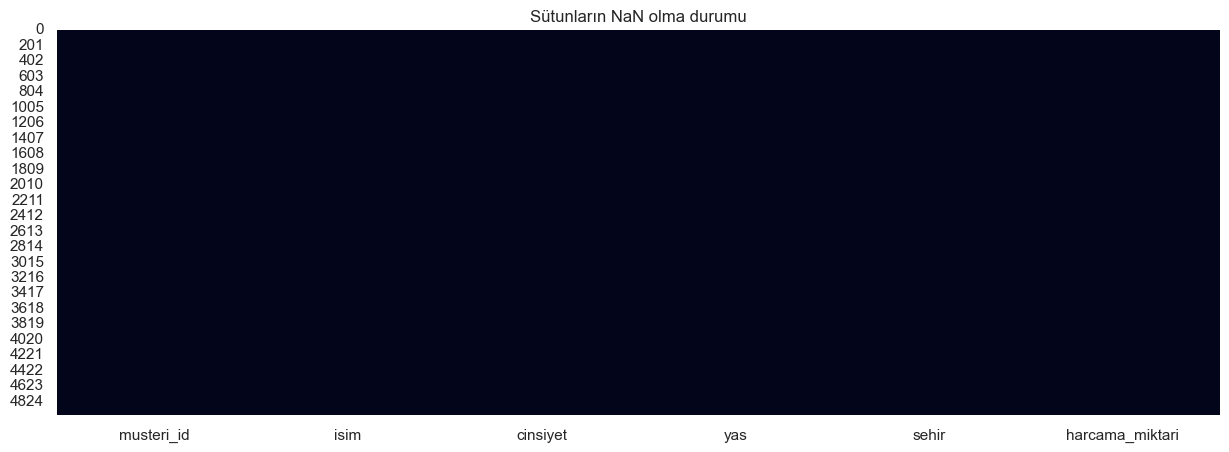

In [1080]:
plt.figure(figsize=(15, 5))
sns.heatmap(musteri_df.isnull(), cbar=False)
plt.title('Sütunların NaN olma durumu')
plt.show()

In [1081]:
satis_missing_columns = highlight_missing_values(satis_df, threshold=50)

Column,Missing Percentage
tarih,0.00%
ürün_kodu,0.00%
ürün_adi,0.00%
kategori,0.00%
fiyat,0.84%
adet,0.00%
toplam_satis,0.84%
musteri_id,0.00%



Columns with more than 50 % missing values:
[]


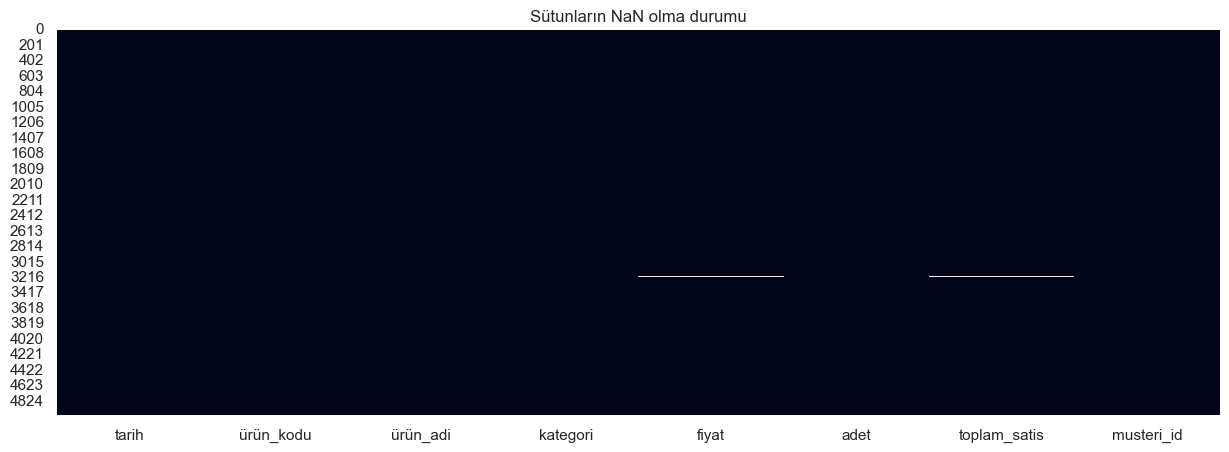

In [1082]:
plt.figure(figsize=(15, 5))
sns.heatmap(satis_df.isnull(), cbar=False)
plt.title('Sütunların NaN olma durumu')
plt.show()

In [1083]:
#Fiyat verisindeki değerler de çok az sayıda eksik değerler veri setinden çıkartılmıştır.
satis_df = satis_df.dropna(subset=['fiyat'])

#Alternatif yöntem: Kategori verilerine göre ortanca değer ile doldurma
#satis_df['fiyat'] = satis_df.groupby('kategori')['fiyat'].transform(lambda x: x.fillna(x.median()))

# Outliers

In [1084]:
kategori_istatistikleri = satis_df.groupby('kategori')['fiyat'].agg(['min', 'max', 'median'])

print(kategori_istatistikleri)

                   min      max  median
kategori                               
Elektronik      13.530 1499.930 739.130
Ev Aletleri     19.840 1498.490 773.020
Giyim           16.660 1496.690 734.170
Kırtasiye       17.730 1499.630 739.675
Mutfak Ürünleri 18.410 1498.630 756.435


In [1085]:
#kategorik ve sayısal sütunların belirlenmesi
musteri_categorical_columns = musteri_df.select_dtypes(include=['object', 'category']).columns.tolist()
musteri_numeric_columns = musteri_df.select_dtypes(include=['int', 'float']).columns.drop('musteri_id').tolist()

In [1086]:
musteri_categorical_columns

['isim', 'cinsiyet', 'sehir']

In [1087]:
musteri_numeric_columns

['yas', 'harcama_miktari']

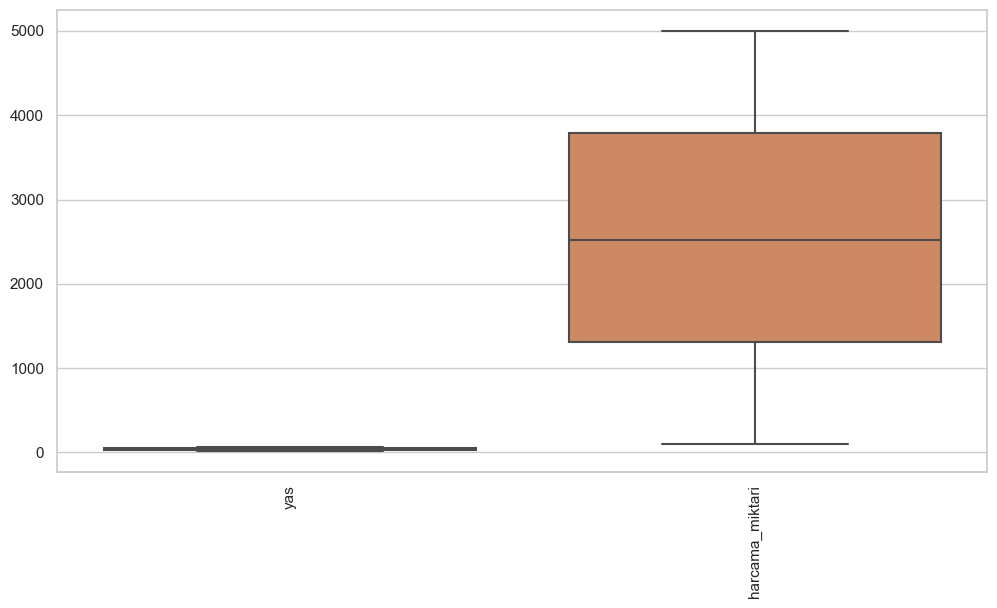

In [1088]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=musteri_df[musteri_numeric_columns])
plt.xticks(rotation=90)
plt.show()

In [1089]:
from scipy.stats import zscore

def multi_method_outlier_analysis(df, numeric_columns, threshold_iqr=1.5, threshold_z=3):
    
    outlier_summary = {
        "IQR": {},
        "Z-Score": {},
    }

    for column in numeric_columns:
        if column not in df.columns:
            continue
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold_iqr * IQR
        upper_bound = Q3 + threshold_iqr * IQR
        outliers_iqr = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
        outlier_summary["IQR"][column] = outliers_iqr

        z_scores = zscore(df[column].dropna())
        outliers_z = df[np.abs(z_scores) > threshold_z].index.tolist()
        outlier_summary["Z-Score"][column] = outliers_z

        print(f"\nColumn: {column}")
        print(f"IQR Outliers: {len(outliers_iqr)} ({outliers_iqr})")
        print(f"Z-Score Outliers: {len(outliers_z)} ({outliers_z})")

    return outlier_summary

In [1090]:
musteri_outlier_results = multi_method_outlier_analysis(musteri_df, musteri_numeric_columns)
print(musteri_outlier_results)


Column: yas
IQR Outliers: 0 ([])
Z-Score Outliers: 0 ([])

Column: harcama_miktari
IQR Outliers: 0 ([])
Z-Score Outliers: 0 ([])
{'IQR': {'yas': [], 'harcama_miktari': []}, 'Z-Score': {'yas': [], 'harcama_miktari': []}}


In [1091]:
satis_categorical_columns = satis_df.select_dtypes(include=['object', 'category']).columns.tolist()
satis_numeric_columns = satis_df.select_dtypes(include=['int', 'float']).columns.drop('musteri_id').tolist()

In [1092]:
satis_categorical_columns

['ürün_kodu', 'ürün_adi', 'kategori']

In [1093]:
satis_numeric_columns

['fiyat', 'adet', 'toplam_satis']

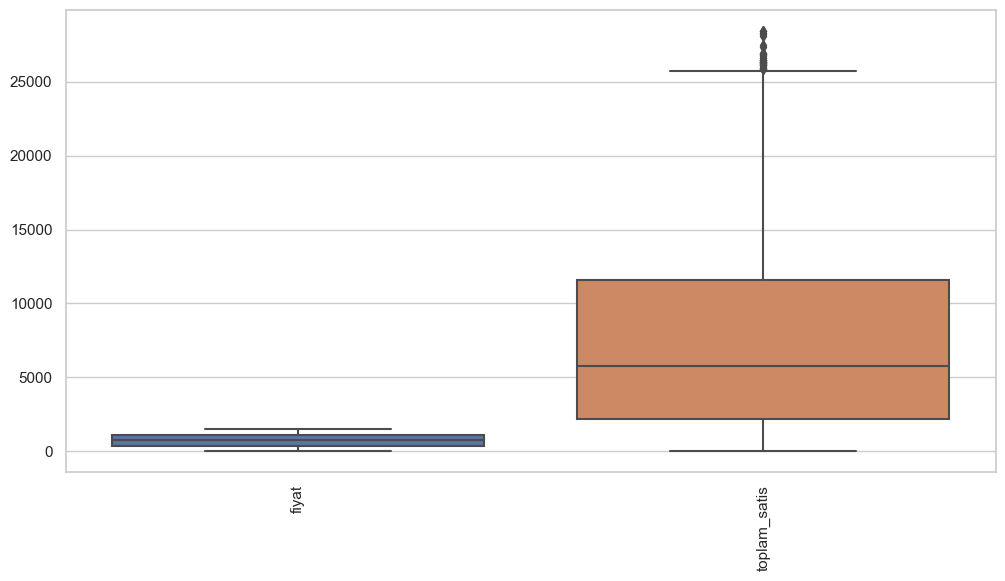

In [1094]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=satis_df[['fiyat','toplam_satis']])
plt.xticks(rotation=90)
plt.show()

In [1095]:
satis_outlier_results = multi_method_outlier_analysis(satis_df, satis_numeric_columns)


Column: fiyat
IQR Outliers: 0 ([])
Z-Score Outliers: 0 ([])

Column: adet
IQR Outliers: 0 ([])
Z-Score Outliers: 0 ([])

Column: toplam_satis
IQR Outliers: 32 ([125, 491, 571, 668, 687, 1155, 1210, 1361, 1424, 1501, 1643, 1668, 1808, 1966, 2063, 2353, 2399, 2545, 2823, 2835, 2893, 3184, 3288, 3326, 3642, 3851, 4482, 4522, 4579, 4698, 4855, 4950])
Z-Score Outliers: 12 ([687, 1210, 1361, 1501, 1808, 1966, 2399, 2823, 3326, 3851, 4579, 4698])


In [1096]:
print(satis_outlier_results)

{'IQR': {'fiyat': [], 'adet': [], 'toplam_satis': [125, 491, 571, 668, 687, 1155, 1210, 1361, 1424, 1501, 1643, 1668, 1808, 1966, 2063, 2353, 2399, 2545, 2823, 2835, 2893, 3184, 3288, 3326, 3642, 3851, 4482, 4522, 4579, 4698, 4855, 4950]}, 'Z-Score': {'fiyat': [], 'adet': [], 'toplam_satis': [687, 1210, 1361, 1501, 1808, 1966, 2399, 2823, 3326, 3851, 4579, 4698]}}


Kategori: Elektronik - Aykırı Değer Sayısı: 150 (6.21%)
Kategori Elektronik: Aykırı değerler % 3 üstünde, medyan ile dolduruluyor.


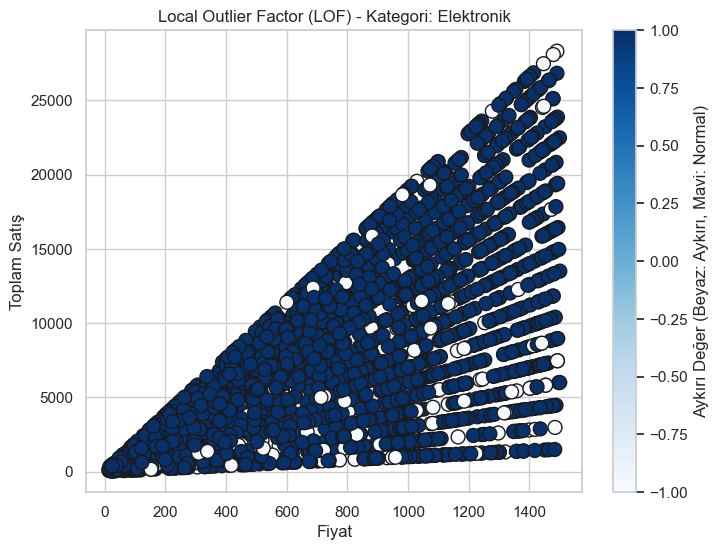

Kategori: Kırtasiye - Aykırı Değer Sayısı: 57 (5.45%)
Kategori Kırtasiye: Aykırı değerler % 3 üstünde, medyan ile dolduruluyor.


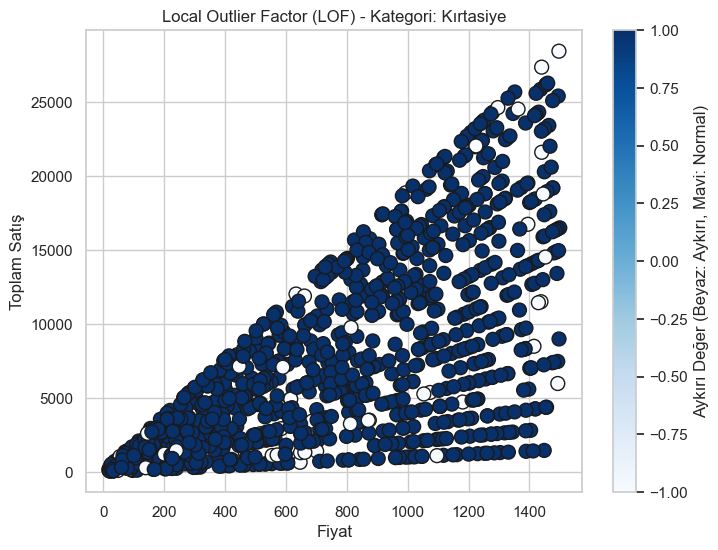

Kategori: Ev Aletleri - Aykırı Değer Sayısı: 33 (6.90%)
Kategori Ev Aletleri: Aykırı değerler % 3 üstünde, medyan ile dolduruluyor.


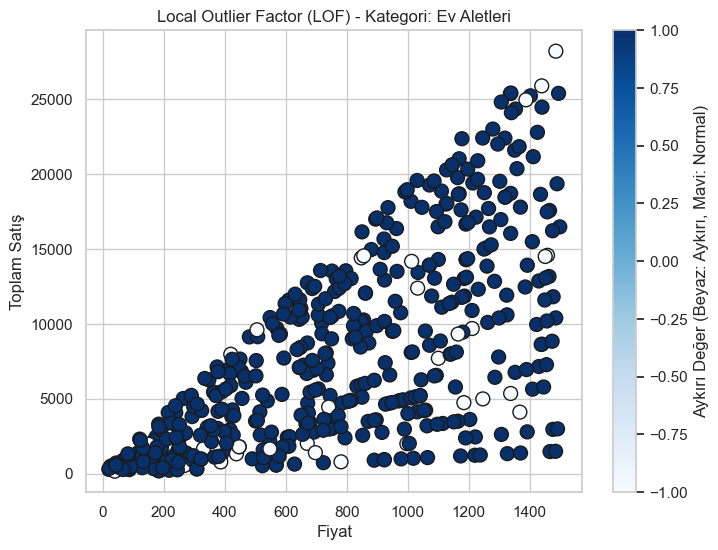

Kategori: Giyim - Aykırı Değer Sayısı: 24 (4.77%)
Kategori Giyim: Aykırı değerler % 3 üstünde, medyan ile dolduruluyor.


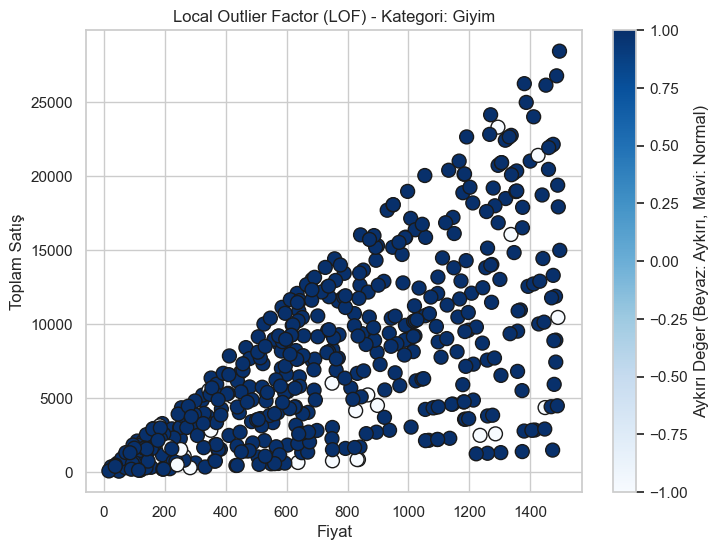

Kategori: Mutfak Ürünleri - Aykırı Değer Sayısı: 29 (5.64%)
Kategori Mutfak Ürünleri: Aykırı değerler % 3 üstünde, medyan ile dolduruluyor.


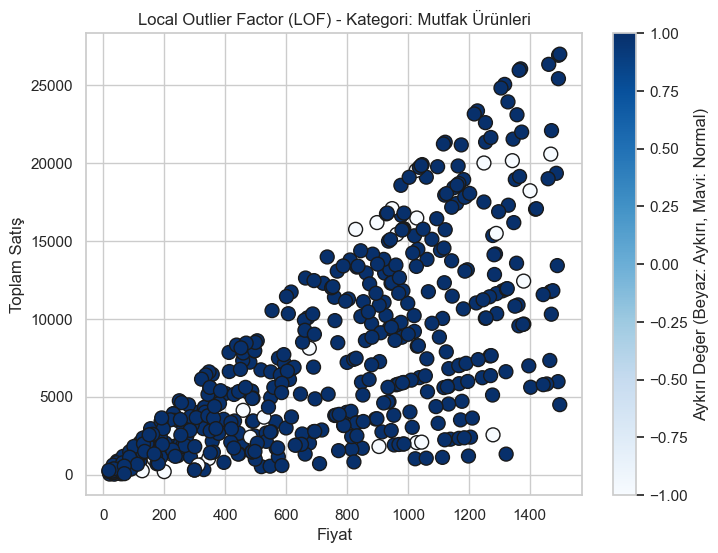

In [1097]:
kategori_column = 'kategori'

threshold_percentage = 3

for kategori in satis_df[kategori_column].unique():
    kategori_df = satis_df[satis_df[kategori_column] == kategori]

    lof = LocalOutlierFactor(n_neighbors=3)

    outliers = lof.fit_predict(kategori_df[satis_numeric_columns])

    kategori_df['outlier'] = outliers

    outlier_count = (kategori_df['outlier'] == -1).sum()
    total_count = kategori_df.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100

    print(f"Kategori: {kategori} - Aykırı Değer Sayısı: {outlier_count} ({outlier_percentage:.2f}%)")

    if outlier_percentage < threshold_percentage:
        satis_df.loc[satis_df[kategori_column] == kategori, 'outlier'] = np.nan
        print(f"Kategori {kategori}: Aykırı değerler % {threshold_percentage} altında, siliniyor.")
    else:
        median_values = kategori_df[satis_numeric_columns].median()
        satis_df.loc[satis_df[kategori_column] == kategori, 'fiyat'] = \
            kategori_df['fiyat'].where(kategori_df['outlier'] == 1, median_values['fiyat'])
        satis_df.loc[satis_df[kategori_column] == kategori, 'toplam_satis'] = \
            kategori_df['toplam_satis'].where(kategori_df['outlier'] == 1, median_values['toplam_satis'])
        print(f"Kategori {kategori}: Aykırı değerler % {threshold_percentage} üstünde, medyan ile dolduruluyor.")

    plt.figure(figsize=(8, 6))
    plt.scatter(kategori_df['fiyat'], kategori_df['toplam_satis'], 
                c=kategori_df['outlier'], cmap='Blues', edgecolors='k', s=100)

    plt.title(f'Local Outlier Factor (LOF) - Kategori: {kategori}')
    plt.xlabel('Fiyat')
    plt.ylabel('Toplam Satış')
    plt.colorbar(label='Aykırı Değer (Beyaz: Aykırı, Mavi: Normal)')

    plt.show()

In [1098]:
satis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4958 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tarih         4958 non-null   datetime64[ns]
 1   ürün_kodu     4958 non-null   object        
 2   ürün_adi      4958 non-null   object        
 3   kategori      4958 non-null   object        
 4   fiyat         4958 non-null   float64       
 5   adet          4958 non-null   int64         
 6   toplam_satis  4958 non-null   float64       
 7   musteri_id    4958 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 348.6+ KB


# EDA

In [1099]:
df = musteri_df.merge(satis_df, on="musteri_id")

In [1100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4958 entries, 0 to 4957
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   musteri_id       4958 non-null   int64         
 1   isim             4958 non-null   object        
 2   cinsiyet         4958 non-null   object        
 3   yas              4958 non-null   int64         
 4   sehir            4958 non-null   object        
 5   harcama_miktari  4958 non-null   float64       
 6   tarih            4958 non-null   datetime64[ns]
 7   ürün_kodu        4958 non-null   object        
 8   ürün_adi         4958 non-null   object        
 9   kategori         4958 non-null   object        
 10  fiyat            4958 non-null   float64       
 11  adet             4958 non-null   int64         
 12  toplam_satis     4958 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 542.3+ KB


In [1101]:
df.head()

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis
0,3902,Candeniz,Erkek,61,Konya,867.200,2024-01-10,P097,Su Şişesi,Mutfak Ürünleri,756.435,18,5344.820
1,3902,Candeniz,Erkek,61,Konya,867.200,2024-06-06,P087,Kulaklık,Elektronik,508.580,6,3051.480
2,2080,Gözel,Erkek,64,Adana,2020.970,2023-03-24,P037,Fırın,Ev Aletleri,1454.800,5,7274.000
3,2080,Gözel,Erkek,64,Adana,2020.970,2023-12-07,P018,Telefon,Elektronik,369.090,4,1476.360
4,7901,Erdogan,Kadın,63,İstanbul,4334.160,2023-03-22,P024,Bilgisayar,Elektronik,913.230,3,2739.690


In [1102]:
def create_date_features(df, date_column):
    df['month'] = df[date_column].dt.month
    df['day_of_month'] = df[date_column].dt.day
    df['day_of_year'] = df[date_column].dt.dayofyear
    df['week_of_year'] = df[date_column].dt.weekofyear
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['year'] = df[date_column].dt.year
    df["is_wknd"] = df[date_column].dt.weekday // 4
    df['is_month_start'] =df[date_column].dt.is_month_start.astype(int)
    df['is_month_end'] = df[date_column].dt.is_month_end.astype(int)
    df['quarter'] = df[date_column].dt.quarter
    df['is_quarter_start'] = df[date_column].dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df[date_column].dt.is_quarter_end.astype(int)
    df['is_year_start'] = df[date_column].dt.is_year_start.astype(int)
    df['is_year_end'] = df[date_column].dt.is_year_end.astype(int)
    return df

In [1103]:
df = create_date_features(df,'tarih')

In [1104]:
df.head()

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,3902,Candeniz,Erkek,61,Konya,867.200,2024-01-10,P097,Su Şişesi,Mutfak Ürünleri,756.435,18,5344.820,1,10,10,2,2,2024,0,0,0,1,0,0,0,0
1,3902,Candeniz,Erkek,61,Konya,867.200,2024-06-06,P087,Kulaklık,Elektronik,508.580,6,3051.480,6,6,158,23,3,2024,0,0,0,2,0,0,0,0
2,2080,Gözel,Erkek,64,Adana,2020.970,2023-03-24,P037,Fırın,Ev Aletleri,1454.800,5,7274.000,3,24,83,12,4,2023,1,0,0,1,0,0,0,0
3,2080,Gözel,Erkek,64,Adana,2020.970,2023-12-07,P018,Telefon,Elektronik,369.090,4,1476.360,12,7,341,49,3,2023,0,0,0,4,0,0,0,0
4,7901,Erdogan,Kadın,63,İstanbul,4334.160,2023-03-22,P024,Bilgisayar,Elektronik,913.230,3,2739.690,3,22,81,12,2,2023,0,0,0,1,0,0,0,0


In [1105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
musteri_id,4958.000,5462.564,2592.518,1004.000,3203.500,5399.000,7710.000,9998.000
yas,4958.000,43.640,15.009,18.000,31.000,43.000,57.000,69.000
harcama_miktari,4958.000,2592.176,1412.516,101.680,1358.452,2578.540,3830.332,4999.440
fiyat,4958.000,743.801,414.411,13.530,395.270,739.130,1089.040,1499.930
adet,4958.000,10.077,5.464,1.000,5.000,10.000,15.000,19.000
toplam_satis,4958.000,7489.076,6176.234,22.280,2457.182,5773.030,11187.040,28419.250
month,4958.000,6.467,3.462,1.000,3.000,6.000,9.000,12.000
day_of_month,4958.000,15.794,8.749,1.000,8.000,16.000,23.000,31.000
day_of_year,4958.000,181.609,105.762,1.000,90.250,180.000,274.000,365.000
week_of_year,4958.000,26.374,15.075,1.000,13.000,26.000,40.000,52.000


In [1106]:
df.describe(include = ['object']).T

,count,unique,top,freq
isim,4958,1303,Aytuna,14
cinsiyet,4958,2,Kadın,2510
sehir,4958,8,İzmir,646
ürün_kodu,4958,10,P011,527
ürün_adi,4958,10,Kalem,527
kategori,4958,5,Elektronik,2417


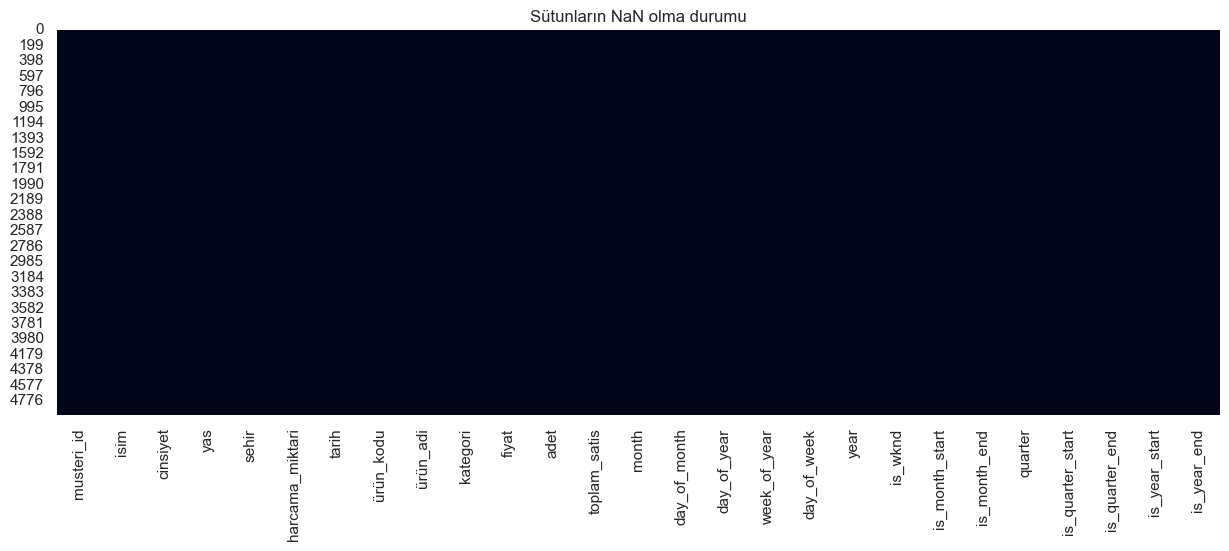

In [1107]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Sütunların NaN olma durumu')
plt.show()

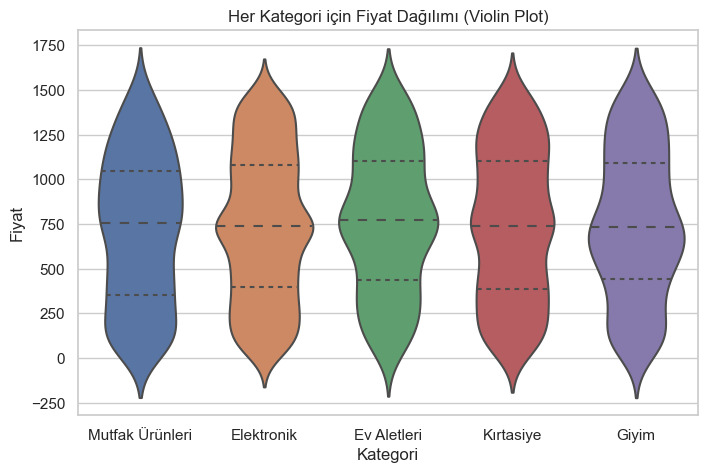

In [1108]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='kategori', y='fiyat', data=df, inner='quartile')
plt.title('Her Kategori için Fiyat Dağılımı (Violin Plot)')
plt.xlabel('Kategori')
plt.ylabel('Fiyat')
plt.show()

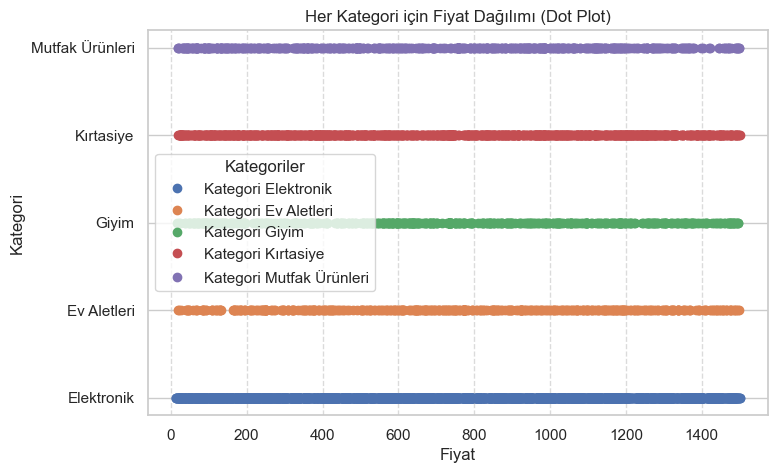

In [1109]:
plt.figure(figsize=(8, 5))
for kategori, grup in df.groupby('kategori'):
    plt.plot(grup['fiyat'], [kategori] * len(grup), 'o', label=f'Kategori {kategori}')

plt.title('Her Kategori için Fiyat Dağılımı (Dot Plot)')
plt.xlabel('Fiyat')
plt.ylabel('Kategori')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Kategoriler')
plt.show()

In [1110]:
#En çok satılan 10 ürün adeti
grouped = df.groupby('ürün_adi')['adet'].sum().reset_index()

sorted_products = grouped.sort_values(by='adet', ascending=False)

top_10_products = sorted_products.head(10)

print(top_10_products)

     ürün_adi  adet
7   Su Şişesi  5240
3       Kalem  5232
8     Telefon  5212
9       Çanta  5197
1      Defter  5179
6       Mouse  5001
5    Kulaklık  4871
2       Fırın  4823
4       Klima  4641
0  Bilgisayar  4567


In [1111]:
# Toplam_satis en çok olan 10 ürün
grouped = df.groupby('ürün_adi')['toplam_satis'].sum().reset_index()

sorted_products = grouped.sort_values(by='toplam_satis', ascending=False)

top_10_products = sorted_products.head(10)

print(top_10_products)

     ürün_adi  toplam_satis
8     Telefon   3978675.310
9       Çanta   3909034.510
3       Kalem   3865125.945
1      Defter   3841881.670
2       Fırın   3746645.240
6       Mouse   3729375.760
7   Su Şişesi   3671222.870
5    Kulaklık   3591237.600
0  Bilgisayar   3495572.780
4       Klima   3302068.150


# Time Series Analysis

In [1112]:
df['tarih'] = pd.to_datetime(df['tarih'])

<AxesSubplot: >

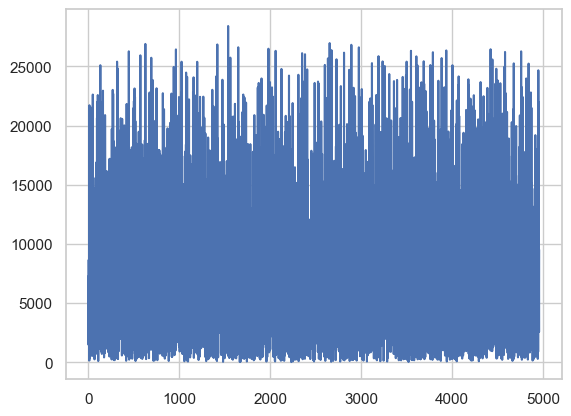

In [1113]:
df['toplam_satis'].plot()

## Haftalık Satış

In [1114]:
weekly_sales = df.groupby(pd.Grouper(key='tarih', freq='W'))['toplam_satis'].sum().reset_index()

In [1115]:
weekly_sales.head()

,tarih,toplam_satis
0,2022-11-06,22763.970
1,2022-11-13,286789.940
2,2022-11-20,344385.100
3,2022-11-27,313237.570
4,2022-12-04,379742.040


<AxesSubplot: >

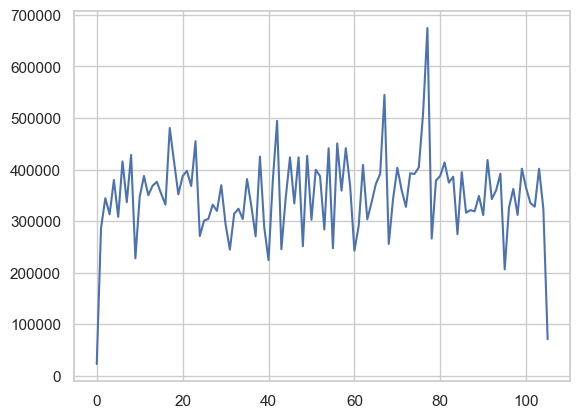

In [1116]:
weekly_sales['toplam_satis'].plot()

In [1117]:
product_weekly = df.groupby(['ürün_kodu', pd.Grouper(key='tarih', freq='W')])['toplam_satis'].sum().reset_index()

In [1118]:
product_weekly.head(10)

,ürün_kodu,tarih,toplam_satis
0,P010,2022-11-06,9834.450
1,P010,2022-11-13,46306.270
2,P010,2022-11-20,26106.740
3,P010,2022-11-27,19934.560
4,P010,2022-12-04,7832.280
5,P010,2022-12-11,85374.990
6,P010,2022-12-18,12543.550
7,P010,2022-12-25,8891.280
8,P010,2023-01-01,32347.460
9,P010,2023-01-08,37860.520


In [1119]:
#her hafta toplam kaç adet ürün satılmış
total_weekly = df.groupby([pd.Grouper(key='tarih', freq='W')])['adet'].sum().reset_index()

In [1120]:
total_weekly.head()

,tarih,adet
0,2022-11-06,57
1,2022-11-13,428
2,2022-11-20,442
3,2022-11-27,458
4,2022-12-04,518


In [1121]:
print(total_weekly.loc[total_weekly['adet'].idxmax()])
print(total_weekly.loc[total_weekly['adet'].idxmin()])
print(total_weekly['adet'].median())

tarih    2024-04-28 00:00:00
adet                     744
Name: 77, dtype: object
tarih    2022-11-06 00:00:00
adet                      57
Name: 0, dtype: object
474.5


In [1122]:
day_of_week_sales = df.groupby('day_of_week')['adet'].sum().reset_index()

day_of_week_sales['day_of_week'] = day_of_week_sales['day_of_week'].map({
    0: 'Pazartesi', 1: 'Salı', 2: 'Çarşamba', 3: 'Perşembe',
    4: 'Cuma', 5: 'Cumartesi', 6: 'Pazar'
})

day_of_week_sales

,day_of_week,adet
0,Pazartesi,7758
1,Salı,7043
2,Çarşamba,7500
3,Perşembe,6787
4,Cuma,6770
5,Cumartesi,7172
6,Pazar,6933


# Aylık Satış

In [1123]:
#aylık toplam satış adeti
monthly_sales = df.groupby(pd.Grouper(key='tarih', freq='M'))['toplam_satis'].sum().reset_index()

<AxesSubplot: >

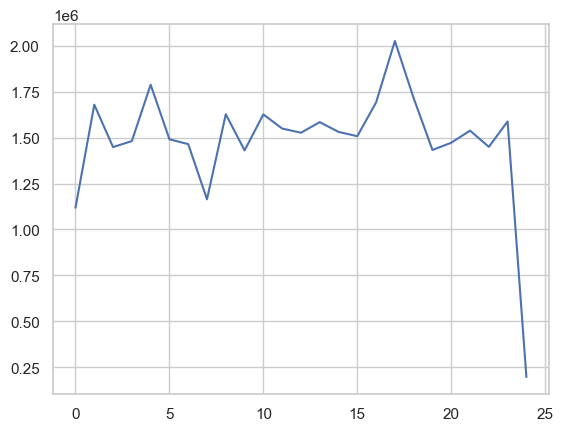

In [1124]:
monthly_sales['toplam_satis'].plot()

In [1125]:
#her ürünün aylık toplam satış adeti
product_monthly = df.groupby(['ürün_kodu', pd.Grouper(key='tarih', freq='M')])['toplam_satis'].sum().reset_index()

In [1126]:
product_monthly.head()

,ürün_kodu,tarih,toplam_satis
0,P010,2022-11-30,106010.560
1,P010,2022-12-31,143161.020
2,P010,2023-01-31,190454.880
3,P010,2023-02-28,148487.240
4,P010,2023-03-31,222047.160


In [1127]:
#her ayın ilk ve son satış günleri
monthly_sales_dates = df.resample('M', on='tarih').agg({'tarih': ['first', 'last']}).reset_index(drop=True)
monthly_sales[['first','last']] = monthly_sales_dates['tarih']

In [1128]:
monthly_sales

,tarih,toplam_satis,first,last
0,2022-11-30,1118493.140,2022-11-06,2022-11-30
1,2022-12-31,1679134.490,2022-12-01,2022-12-31
2,2023-01-31,1448434.325,2023-01-01,2023-01-31
3,2023-02-28,1481367.380,2023-02-01,2023-02-28
4,2023-03-31,1788209.860,2023-03-01,2023-03-31
5,2023-04-30,1490972.790,2023-04-01,2023-04-30
6,2023-05-31,1464674.985,2023-05-01,2023-05-31
7,2023-06-30,1164417.735,2023-06-01,2023-06-30
8,2023-07-31,1627603.385,2023-07-01,2023-07-31
9,2023-08-31,1430522.760,2023-08-01,2023-08-31


In [1129]:
month_of_year_sales = df.groupby('quarter')['adet'].sum().reset_index()

month_of_year_sales['quarter'] = month_of_year_sales['quarter'].map({
    1: 'Quarter 1', 2: 'Quarter 2', 3: 'Quarter 3', 4: 'Quarter 4',
})

month_of_year_sales

,quarter,adet
0,Quarter 1,12766
1,Quarter 2,12254
2,Quarter 3,12355
3,Quarter 4,12588


# Kategorisel ve Sayısal Analiz

In [1130]:
kategorik_toplam = df.groupby("kategori")['toplam_satis'].sum().reset_index()
kategorik_toplam['oran'] = (kategorik_toplam['toplam_satis'] / kategorik_toplam['toplam_satis'].sum()) * 100

In [1131]:
kategorik_toplam

,kategori,toplam_satis,oran
0,Elektronik,18096929.600,48.738
1,Ev Aletleri,3746645.240,10.090
2,Giyim,3909034.510,10.528
3,Kırtasiye,7707007.615,20.756
4,Mutfak Ürünleri,3671222.870,9.887


In [1132]:
print(df['yas'].max())
print(df['yas'].min())

69
18


In [1133]:
bins = [18, 25, 35, 50, float('inf')]
labels = ["18-25", "26-35", "36-50", "50+"]

df['yas_grubu'] = pd.cut(df['yas'], bins=bins, labels=labels, right=True)

In [1134]:
yas_toplam = df.groupby("yas_grubu")['toplam_satis'].sum().reset_index()

In [1135]:
yas_toplam

,yas_grubu,toplam_satis
0,18-25,5132816.220
1,26-35,6708297.545
2,36-50,11193892.655
3,50+,13317490.650


In [1136]:
grouped_kategori = df.groupby(['yas_grubu', 'kategori'])['toplam_satis'].sum().reset_index()
max_spending = grouped_kategori.loc[grouped_kategori.groupby('yas_grubu')['toplam_satis'].idxmax()]

In [1137]:
max_spending

,yas_grubu,kategori,toplam_satis
0,18-25,Elektronik,2553895.070
5,26-35,Elektronik,3356930.370
10,36-50,Elektronik,5294759.880
15,50+,Elektronik,6604199.650


In [1138]:
grouped_urun = df.groupby(['yas_grubu', 'ürün_adi'])['adet'].sum().reset_index()
most_purchased = grouped_urun.loc[grouped_urun.groupby('yas_grubu')['adet'].idxmax()]

In [1139]:
most_purchased

,yas_grubu,ürün_adi,adet
0,18-25,Bilgisayar,766
11,26-35,Defter,1018
29,36-50,Çanta,1746
33,50+,Kalem,1925


Kadın ve erkek müşterilerin harcama miktarlarını karşılaştırın ve harcama davranışları arasındaki farkı tespit edin.

In [1140]:
cinsiyet_toplam = df.groupby("cinsiyet")['toplam_satis'].sum().reset_index()

In [1141]:
cinsiyet_toplam

,cinsiyet,toplam_satis
0,Erkek,18474525.865
1,Kadın,18656313.970


In [1142]:
abs(
    cinsiyet_toplam.loc[cinsiyet_toplam["cinsiyet"] == "Erkek", 'toplam_satis'].values[0] - 
    cinsiyet_toplam.loc[cinsiyet_toplam["cinsiyet"] == "Kadın", 'toplam_satis'].values[0]
)

181788.10500000045

# İleri Düzey Veri Manipülasyonu 

Müşterilerin şehir bazında toplam harcama miktarını bulun ve şehirleri en çok harcama yapan müşterilere göre sıralayın.

In [1143]:
musteri_sehir = df.groupby(['musteri_id', 'sehir'])['toplam_satis'].sum().reset_index()

In [1144]:
musteri_sehir.sort_values(by=['sehir','toplam_satis'], ascending=[True,False])

,musteri_id,sehir,toplam_satis
2230,7380,Adana,55240.360
1326,4691,Adana,43660.740
2501,8128,Adana,41857.880
893,3462,Adana,40431.560
1108,4044,Adana,40280.670
254,1744,Adana,39965.020
919,3536,Adana,39427.610
308,1907,Adana,38548.920
222,1657,Adana,38298.180
1723,5818,Adana,38010.590


In [1145]:
grouped_month = df.groupby(['ürün_kodu',pd.Grouper(key='tarih', freq='M')])['toplam_satis'].sum().reset_index()

In [1146]:
grouped_month['degisim_yuzdesi'] = grouped_month['toplam_satis'].pct_change() * 100

In [1147]:
grouped_month.head()

,ürün_kodu,tarih,toplam_satis,degisim_yuzdesi
0,P010,2022-11-30,106010.560,NaN
1,P010,2022-12-31,143161.020,35.044
2,P010,2023-01-31,190454.880,33.035
3,P010,2023-02-28,148487.240,-22.035
4,P010,2023-03-31,222047.160,49.540


In [1148]:
grouped_kategori_month = df.groupby(['kategori',pd.Grouper(key='tarih', freq='M')])['toplam_satis'].sum().reset_index()

In [1149]:
grouped_kategori_month.head()

,kategori,tarih,toplam_satis
0,Elektronik,2022-11-30,580030.630
1,Elektronik,2022-12-31,803898.510
2,Elektronik,2023-01-31,761373.690
3,Elektronik,2023-02-28,595737.470
4,Elektronik,2023-03-31,842913.420


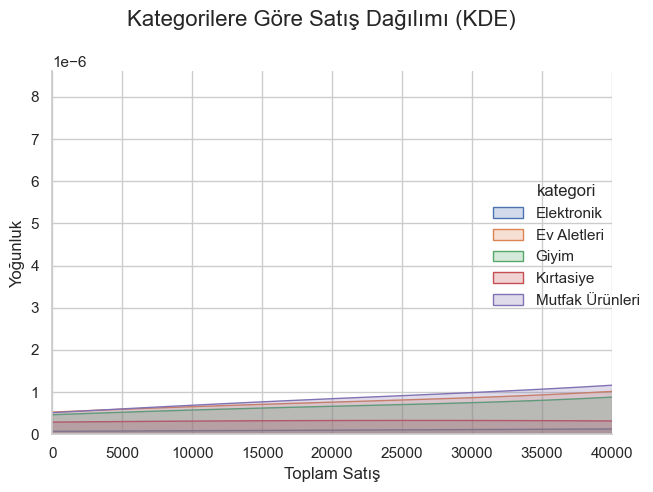

In [1150]:
sns.set(style="whitegrid")

g = sns.FacetGrid(grouped_kategori_month, hue="kategori", height=5, xlim=(0, 40000))
g.map(sns.kdeplot, "toplam_satis", shade=True)

g.add_legend()
g.set_axis_labels("Toplam Satış", "Yoğunluk")
g.fig.suptitle("Kategorilere Göre Satış Dağılımı (KDE)", fontsize=16)

plt.tight_layout()
plt.show()

In [1151]:
categories = grouped_kategori_month['kategori'].unique()

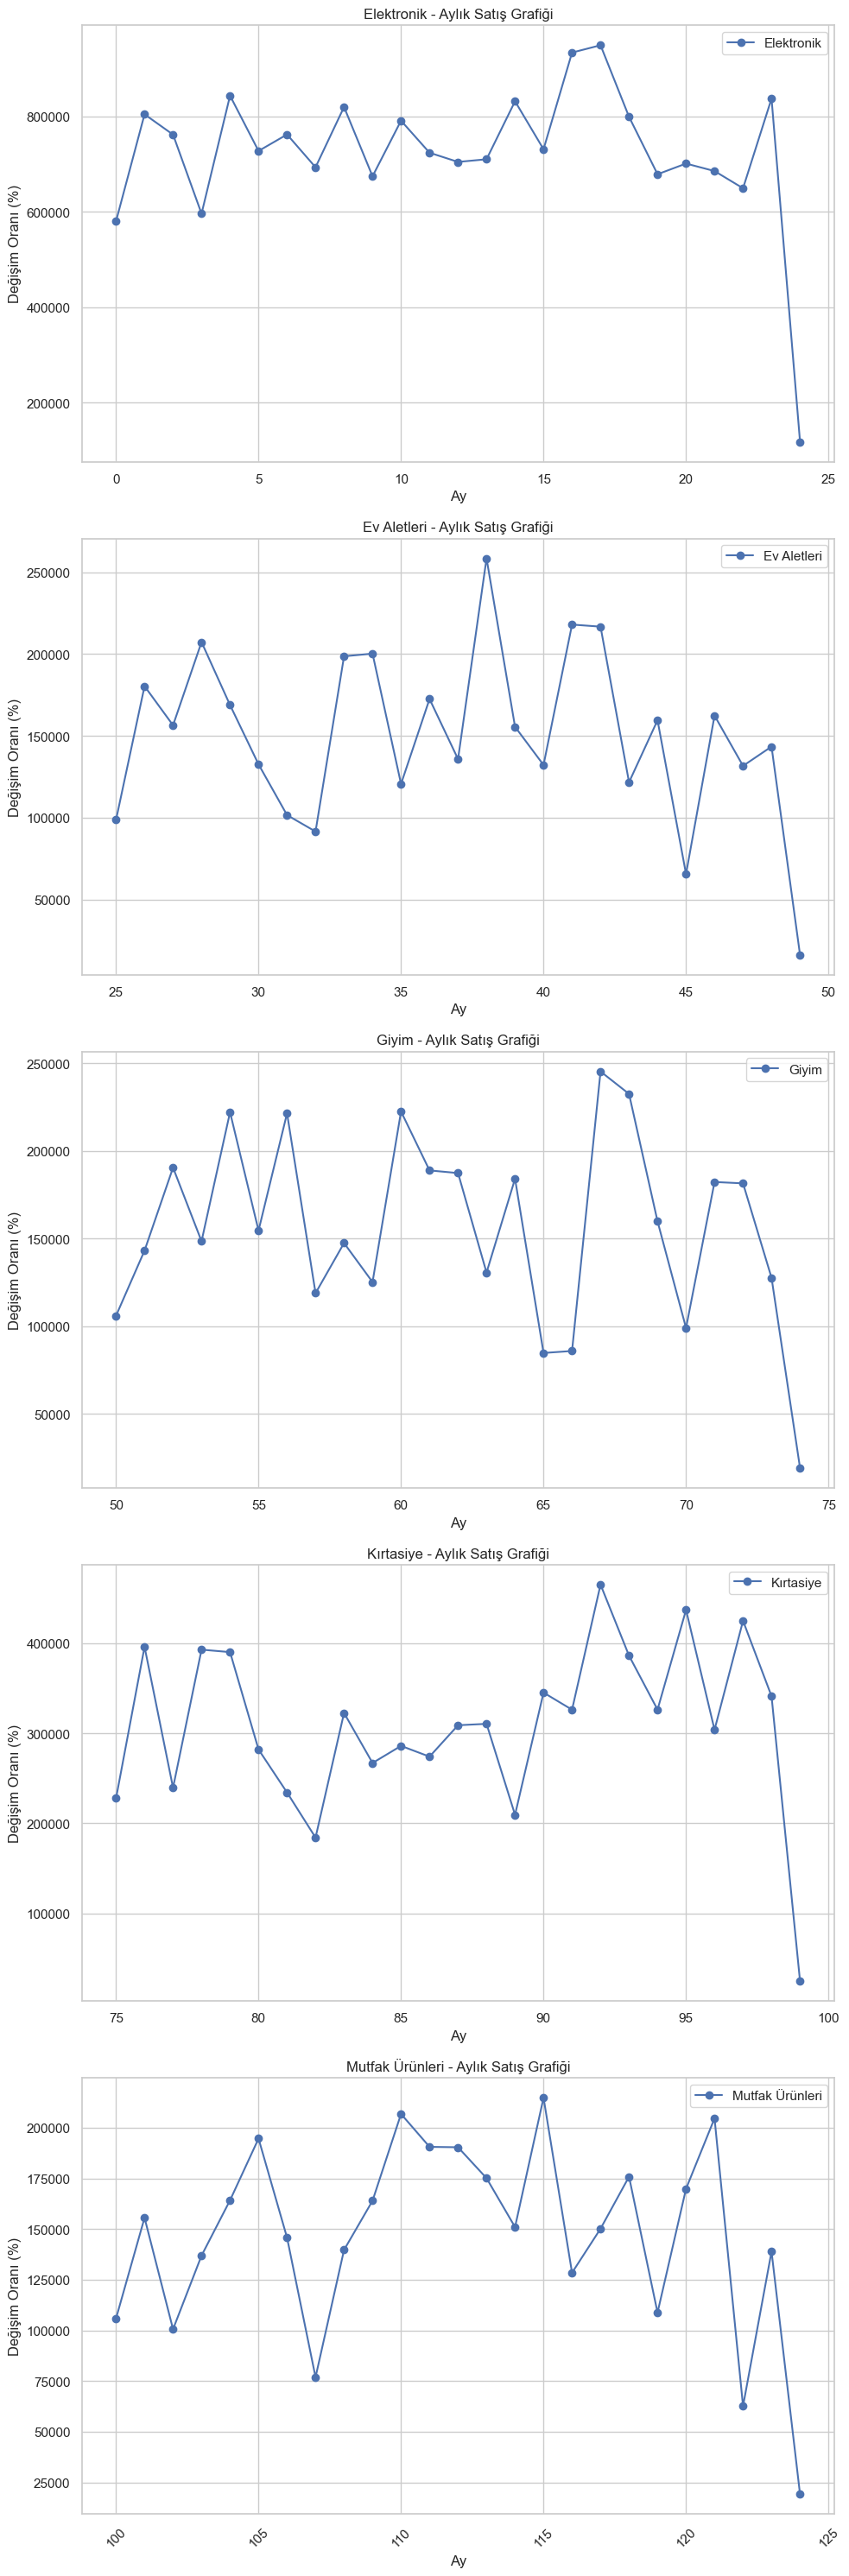

In [1152]:
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 6 * len(categories)))

for i, kategori in enumerate(categories):
    mask_data = grouped_kategori_month.loc[grouped_kategori_month["kategori"] == kategori]
    
    axes[i].plot(mask_data['toplam_satis'], marker='o', label=kategori, color='b')
    
    axes[i].set_title(f'{kategori} - Aylık Satış Grafiği')
    axes[i].set_xlabel('Ay')
    axes[i].set_ylabel('Değişim Oranı (%)')
    axes[i].grid(True)
    axes[i].legend()
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pareto Analizi

Pareto Analizi: Satışların %80’ini oluşturan ürünleri belirleyin (80/20 kuralını uygulayın). Bu ürünleri grafikte gösterin.

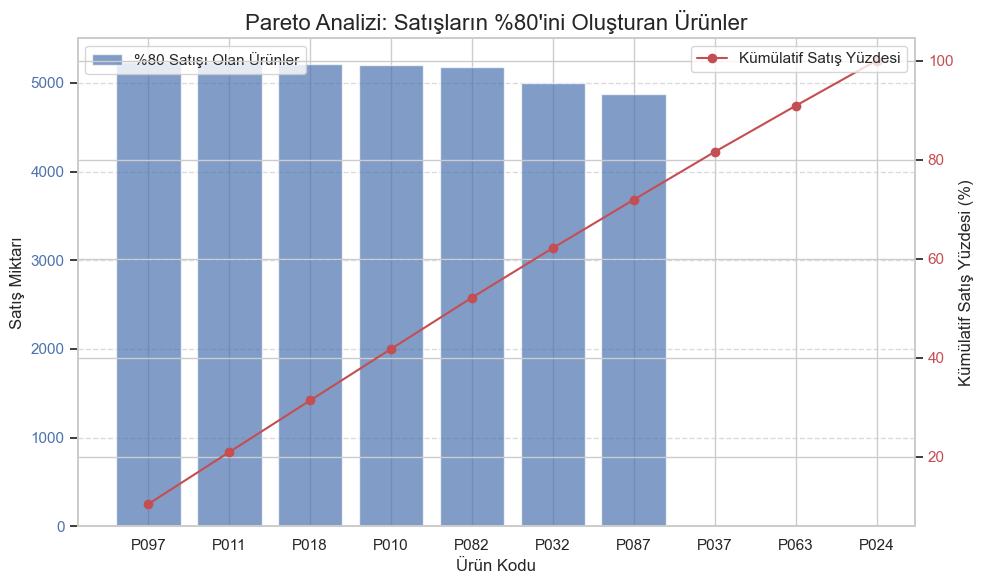

In [1153]:
product_sales = df.groupby('ürün_kodu')['adet'].sum().sort_values(ascending=False)

sales_percentage = product_sales.cumsum() / product_sales.sum() * 100

pareto_80 = sales_percentage[sales_percentage <= 80]

pareto_products = product_sales[pareto_80.index]

plt.figure(figsize=(10, 6))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.bar(pareto_products.index, pareto_products.values, color='b', alpha=0.7, label='%80 Satışı Olan Ürünler')
ax2.plot(sales_percentage.index, sales_percentage.values, color='r', marker='o', label='Kümülatif Satış Yüzdesi')

plt.title('Pareto Analizi: Satışların %80\'ini Oluşturan Ürünler', fontsize=16)
ax1.set_xlabel('Ürün Kodu', fontsize=12)
ax1.set_ylabel('Satış Miktarı', fontsize=12)
ax2.set_ylabel('Kümülatif Satış Yüzdesi (%)', fontsize=12)

ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

ax1.tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


# Tahmin Modeli

In [1154]:
weekly_sales = df.groupby(pd.Grouper(key='tarih', freq='W'))['toplam_satis'].sum().reset_index()

In [1155]:
weekly_sales.head()

,tarih,toplam_satis
0,2022-11-06,22763.970
1,2022-11-13,286789.940
2,2022-11-20,344385.100
3,2022-11-27,313237.570
4,2022-12-04,379742.040


<AxesSubplot: >

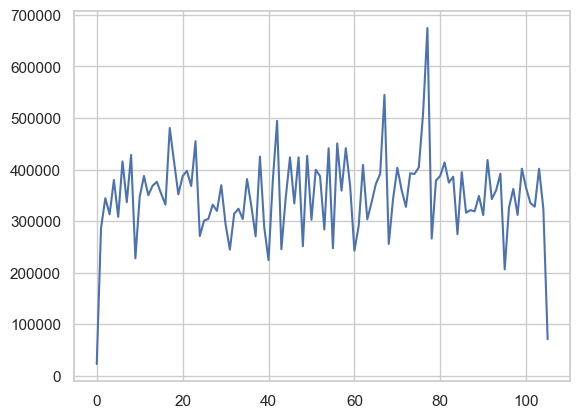

In [1156]:
weekly_sales["toplam_satis"].plot()

In [1157]:
weekly_sales.index = weekly_sales['tarih']

In [1158]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [1159]:
result = seasonal_decompose(weekly_sales["toplam_satis"], model='additive')

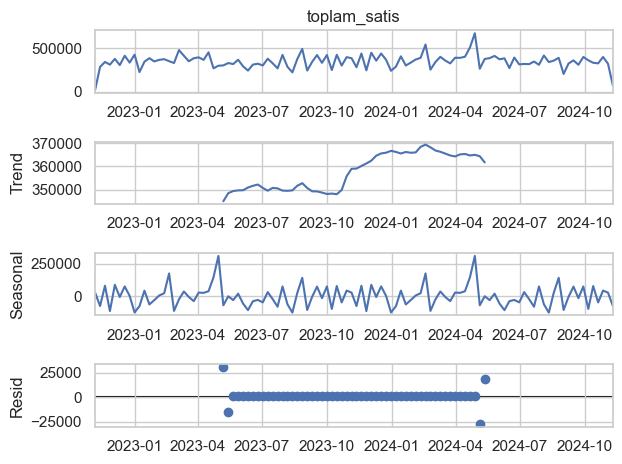

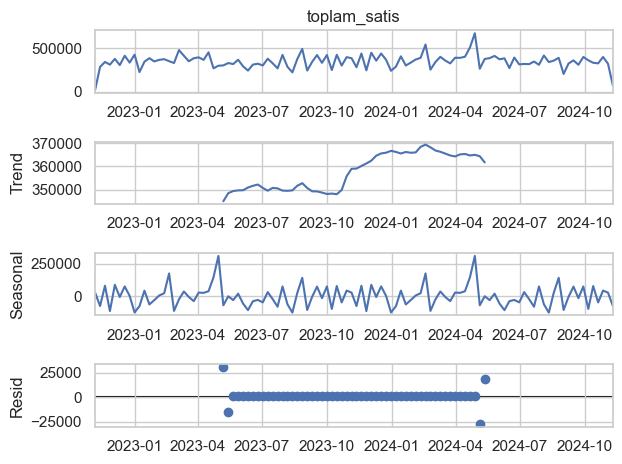

In [1160]:
result.plot()

In [1161]:
weekly_sales = weekly_sales.reset_index(drop=True)

In [1162]:
linear_df = weekly_sales.sort_values(by='tarih').reset_index(drop=True)

linear_df['index'] = range(1, len(linear_df) + 1)

In [1163]:
linear_df.head()

,tarih,toplam_satis,index
0,2022-11-06,22763.970,1
1,2022-11-13,286789.940,2
2,2022-11-20,344385.100,3
3,2022-11-27,313237.570,4
4,2022-12-04,379742.040,5


In [1164]:
train_size = int(linear_df.shape[0]* 0.8)
train_size

84

In [1165]:
train = linear_df[0:train_size]
test = linear_df[train_size:]

In [1166]:
train.shape

(84, 3)

In [1167]:
test.shape

(22, 3)

In [1168]:
X_train, y_train = train['index'].values.reshape(-1, 1), train['toplam_satis'].values.reshape(-1, 1)

In [1169]:
X_test, y_test = test['index'].values.reshape(-1, 1), test['toplam_satis'].values.reshape(-1, 1)

In [1170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1171]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1172]:
model.coef_

array([[896.54604435]])

In [1173]:
model.intercept_

array([317843.40823437])

In [1174]:
forecast = model.predict(X_test)

In [1175]:
forecast

array([[394049.82200373],
       [394946.36804807],
       [395842.91409242],
       [396739.46013677],
       [397636.00618111],
       [398532.55222546],
       [399429.0982698 ],
       [400325.64431415],
       [401222.19035849],
       [402118.73640284],
       [403015.28244718],
       [403911.82849153],
       [404808.37453587],
       [405704.92058022],
       [406601.46662457],
       [407498.01266891],
       [408394.55871326],
       [409291.1047576 ],
       [410187.65080195],
       [411084.19684629],
       [411980.74289064],
       [412877.28893498]])

In [1176]:
y_test

array([[274547.38 ],
       [394983.1  ],
       [316257.26 ],
       [321277.09 ],
       [318970.77 ],
       [348922.35 ],
       [311637.1  ],
       [418471.11 ],
       [342734.3  ],
       [359684.7  ],
       [392021.19 ],
       [206298.105],
       [326361.47 ],
       [362457.68 ],
       [311929.41 ],
       [401734.635],
       [363799.365],
       [334835.925],
       [328016.33 ],
       [401619.665],
       [323898.42 ],
       [ 70866.81 ]])

In [1177]:
rmse = mean_squared_error(y_test, forecast, squared=False)
rmse

105208.19766297477

In [1178]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val

In [1179]:
smape(y_test, forecast)

23.6304428985365